In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Statistical analysis
import scipy.stats as stats
import statsmodels.api as sm

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Model
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv("C:\\Users\\akash\\OneDrive\\Desktop\\Data files\\seattleweather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [4]:
df.shape

(1461, 6)

In [5]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
# Convert the "date" column to datetime format
df['date']= pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [8]:
# Extract additional features
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [9]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,day_of_week,month,year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,6,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,0,1,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1,1,2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2,1,2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,3,1,2012


In [10]:
# Define a function to get the season based on the month
def get_season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    else:
        return 'Winter'

In [11]:
df['season'] = df['month'].apply(get_season)

In [12]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,day_of_week,month,year,season
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,6,1,2012,Winter
1,2012-01-02,10.9,10.6,2.8,4.5,rain,0,1,2012,Winter
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1,1,2012,Winter
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2,1,2012,Winter
4,2012-01-05,1.3,8.9,2.8,6.1,rain,3,1,2012,Winter


In [13]:
# df.to_csv('weathers.csv', index=False )

In [14]:
df.describe()

,precipitation,temp_max,temp_min,wind,day_of_week,month,year
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136,2.997947,6.522930,2013.498973
std,6.680194,7.349758,5.023004,1.437825,2.001197,3.449884,1.118723
min,0.000000,-1.600000,-7.100000,0.400000,0.000000,1.000000,2012.000000
25%,0.000000,10.600000,4.400000,2.200000,1.000000,4.000000,2012.000000
50%,0.000000,15.600000,8.300000,3.000000,3.000000,7.000000,2013.000000
75%,2.800000,22.200000,12.200000,4.000000,5.000000,10.000000,2014.000000
max,55.900000,35.600000,18.300000,9.500000,6.000000,12.000000,2015.000000


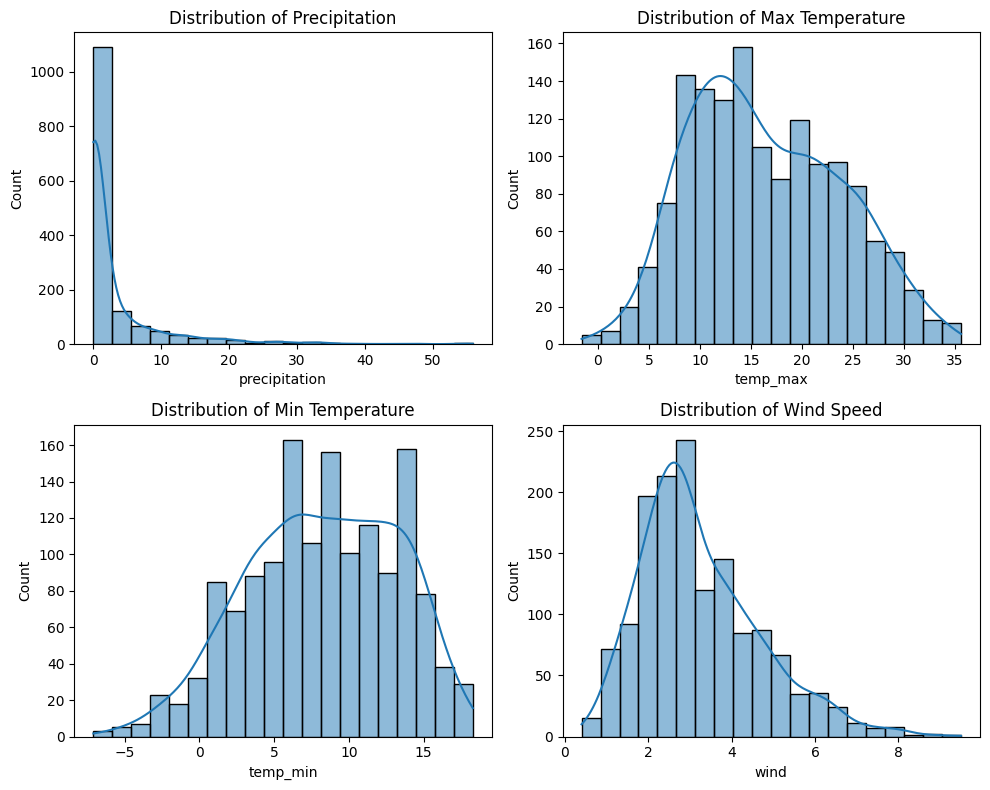

In [15]:
# Distribution Analysis
plt.figure(figsize=(10, 8))

plt.subplot(2, 2 ,1)
sns.histplot(df['precipitation'], bins=20, kde=True)
plt.title('Distribution of Precipitation')

plt.subplot(2,2,2)
sns.histplot(df['temp_max'], bins=20, kde=True)
plt.title('Distribution of Max Temperature')

plt.subplot(2,2,3)
sns.histplot(df['temp_min'], bins=20, kde=True)
plt.title('Distribution of Min Temperature')

plt.subplot(2,2,4)
sns.histplot(df['wind'], bins=20, kde=True)
plt.title('Distribution of Wind Speed')

plt.tight_layout()
plt.show()

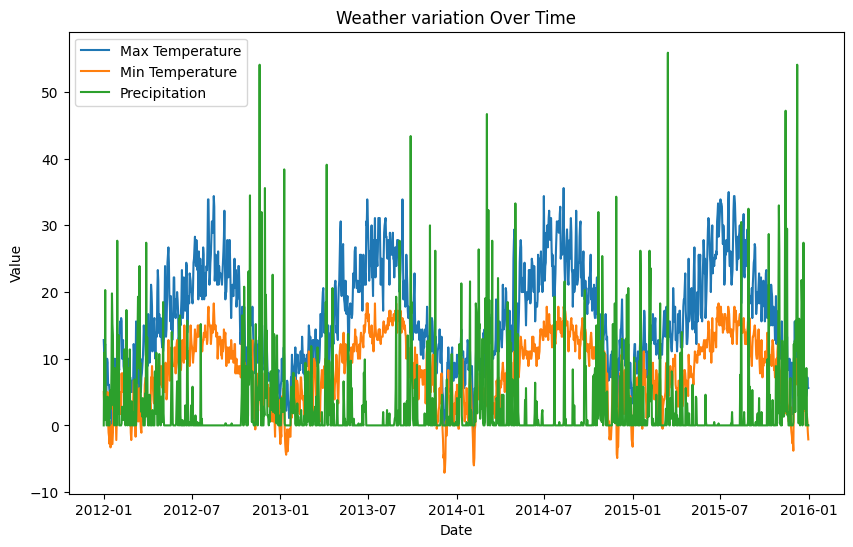

In [16]:
# Line plot Weather variables over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='date', y='temp_max', label='Max Temperature')
sns.lineplot(data=df, x='date', y='temp_min', label='Min Temperature')
sns.lineplot(data=df, x='date', y='precipitation', label='Precipitation')

plt.title('Weather variation Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

* Max Temperature: This line represents the maximum temperature recorded for each date.
* Min Temperature: This line represents the minimum temperature recorded for each date.
* Precipitation: This line represents the amount of precipitation (rainfall) recorded for each date.
##### The plot provides a comprehensive view of how these weather variables fluctuate over time. 

#### Insights: This visualization helps in gaining insights into how different weather variables are correlated and how they evolve over time. For instance, you can observe if there are any correlations between temperature and precipitation patterns.

#####  The line plot provides a clear and concise representation of the variation of weather variables over time, enabling easy interpretation and analysis of temporal trends in weather data.

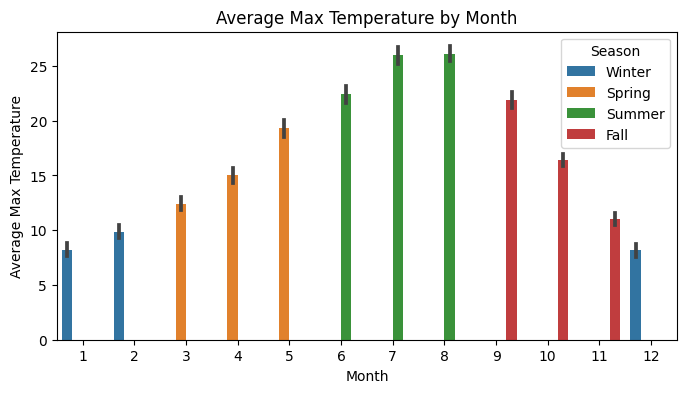

In [17]:
# Average weather conditions by month
plt.figure(figsize=(8,4))
sns.barplot(x=df['month'], y=df['temp_max'], hue='season', data=df)
plt.title('Average Max Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Max Temperature')
plt.legend(title="Season")
plt.show()

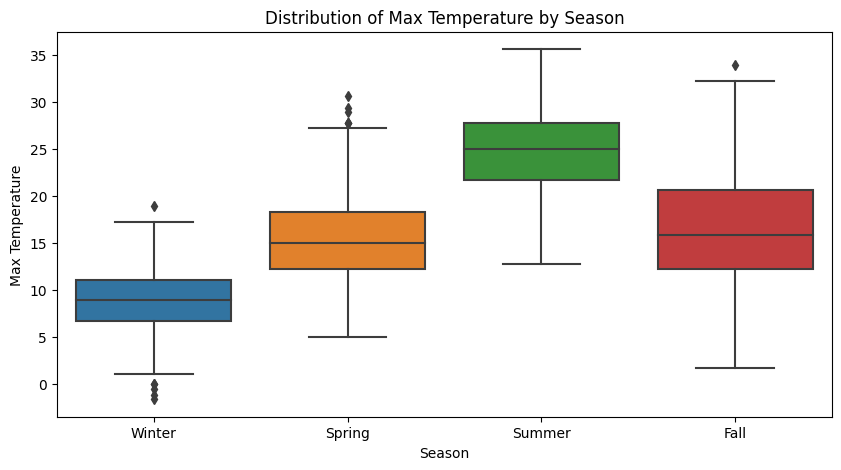

In [18]:
# Distribution of weather varibles by season
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x=df['season'], y=df['temp_max'])
plt.title('Distribution of Max Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Max Temperature')
plt.show()

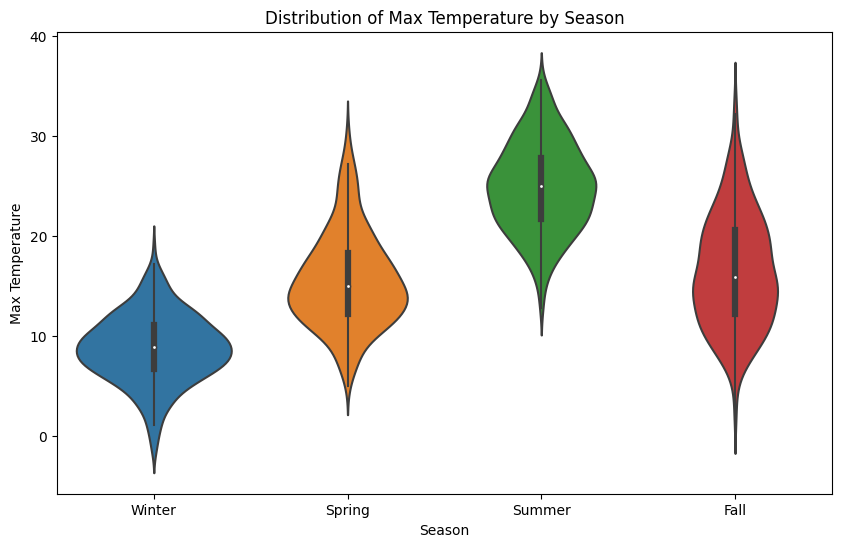

In [19]:
# Violin Plot: Distribution of weather variables by season
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='season', y='temp_max')
plt.title('Distribution of Max Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Max Temperature')
plt.show()


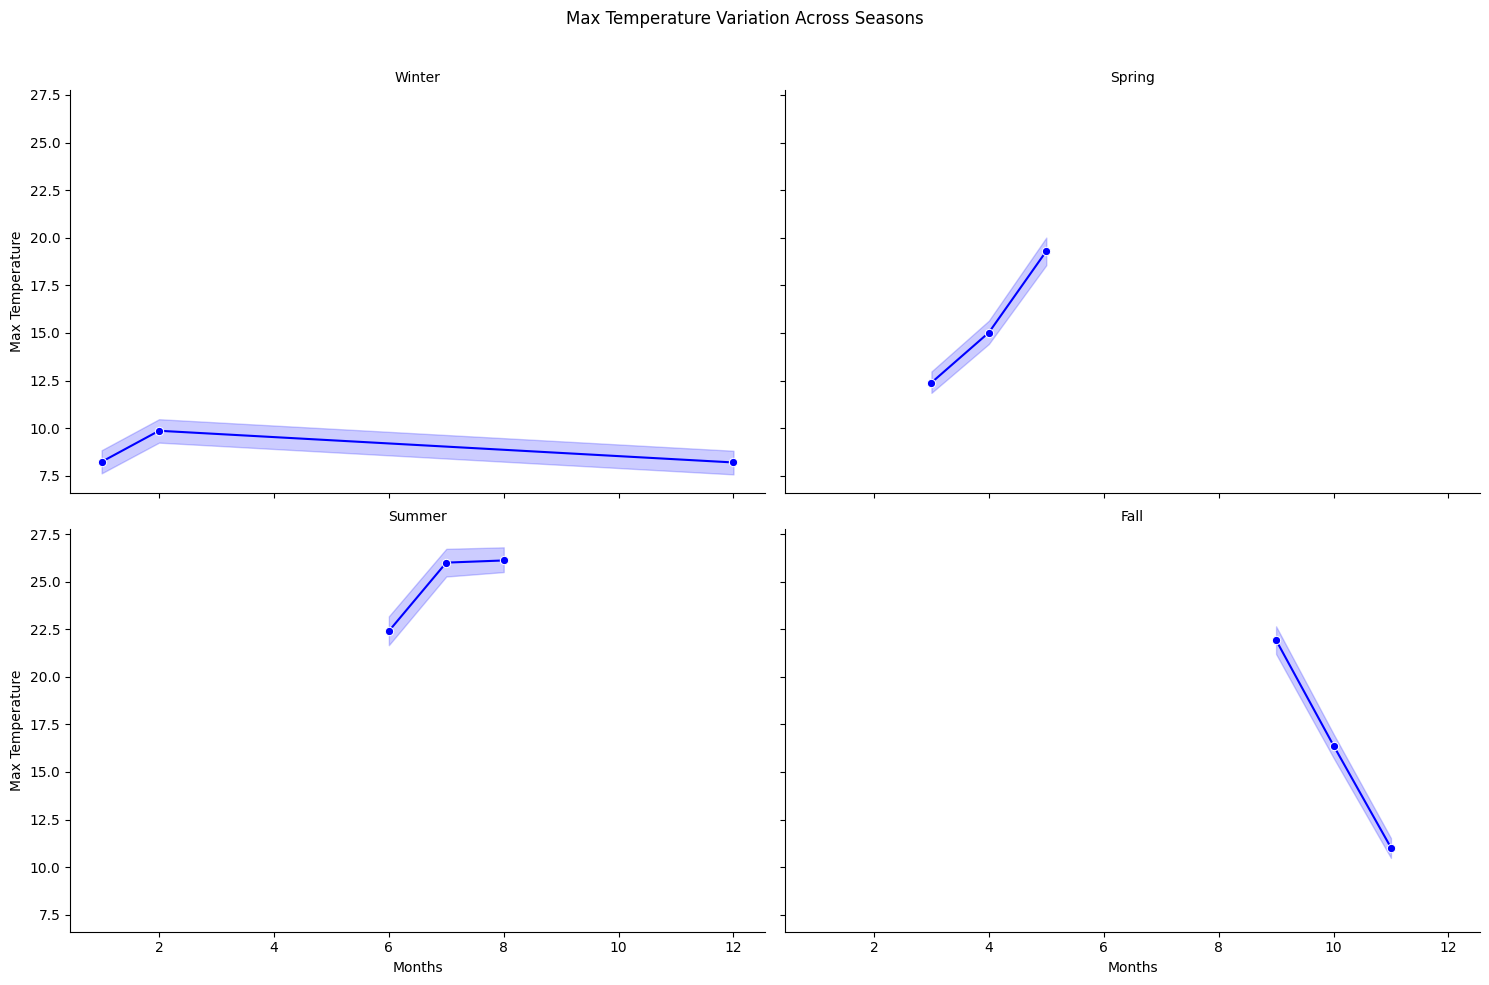

In [20]:
# Comparison of weather variables across seasons
g= sns.FacetGrid(df, col='season', col_wrap=2, height=5, aspect=1.5)
g.map(sns.lineplot, 'month', 'temp_max', marker='o', color='blue')
g.set_titles('{col_name}')
g.set_axis_labels('Months', 'Max Temperature')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Max Temperature Variation Across Seasons')
plt.show()

In [21]:
rainy_days_temp_max = df[df['weather'] == 'rain']['temp_max']
sunny_days_temp_max = df[df['weather'] == 'sun']['temp_max']

In [22]:
t_stat, p_value = stats.ttest_ind(rainy_days_temp_max, sunny_days_temp_max)

print("T-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in maximum temperature between rainy days and sunny days.')
else:
    print("Fail to reject the null hypothesis: There is no significant difference in maximum temperature between rainy days and sunny days.")

T-statistic: -17.69611119167725
P-value: 7.49389511750165e-63
Reject the null hypothesis: There is a significant difference in maximum temperature between rainy days and sunny days.


In [23]:
# Aggregate precipitation by year and month
precipitation_by_year_month = df.groupby(['year','month'])['precipitation'].sum()

In [24]:
# Find the year and month with the maximum precipitation
max_precipitation = precipitation_by_year_month.idxmax()
max_year, max_month= max_precipitation

In [25]:
print(f"The year and month with the most rain is: {max_year}-{max_month}")

The year and month with the most rain is: 2015-12


<Figure size 1000x600 with 0 Axes>

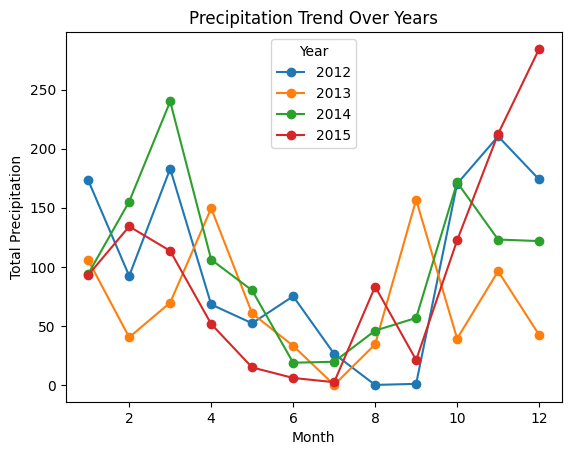

In [26]:
# Precipitation trend over years
plt.figure(figsize=(10,6))
precipitation_by_year_month.unstack(level=0).plot(kind='line', marker='o')
plt.title('Precipitation Trend Over Years')
plt.xlabel('Month')
plt.ylabel('Total Precipitation')
plt.legend(title='Year')
plt.show()

In [27]:
# Correlation Analysis
correlation_matrix = df[['precipitation', 'temp_max', 'temp_min', 'wind']].corr()

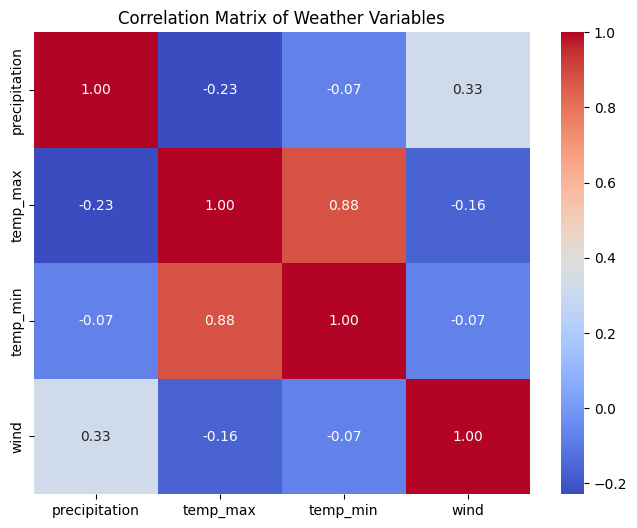

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weather Variables')
plt.show()


In [29]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,day_of_week,month,year,season
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,6,1,2012,Winter
1,2012-01-02,10.9,10.6,2.8,4.5,rain,0,1,2012,Winter
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1,1,2012,Winter
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2,1,2012,Winter
4,2012-01-05,1.3,8.9,2.8,6.1,rain,3,1,2012,Winter


In [30]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [31]:
label_encoder = LabelEncoder()
df['weather'] = label_encoder.fit_transform(df['weather'])

In [32]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,day_of_week,month,year,season
0,2012-01-01,0.0,12.8,5.0,4.7,0,6,1,2012,Winter
1,2012-01-02,10.9,10.6,2.8,4.5,2,0,1,2012,Winter
2,2012-01-03,0.8,11.7,7.2,2.3,2,1,1,2012,Winter
3,2012-01-04,20.3,12.2,5.6,4.7,2,2,1,2012,Winter
4,2012-01-05,1.3,8.9,2.8,6.1,2,3,1,2012,Winter


In [33]:
df.to_csv('weather_cast.csv', index=False )

In [34]:
x = df.drop(columns=['day_of_week', 'season', 'date', 'weather', 'month','year'])

In [35]:
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [36]:
y = df['weather']

In [37]:
# (rain:2, sun:4, fog:1, drizzle:0, snow:3)
y.value_counts()

2    641
4    640
1    101
0     53
3     26
Name: weather, dtype: int64

#### Resampling Techniques:

* Oversampling: Increase the number of instances in the minority class (e.g., classes 0, 1, and 3) to balance the dataset.
* Undersampling: Decrease the number of instances in the majority class (e.g., classes 2 and 4) to balance the dataset.
* Synthetic Minority Over-sampling Technique (SMOTE): Generate synthetic samples for the minority class to balance the dataset.

In [38]:
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [39]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int32

## Data Preprocessing

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import BalancedBaggingClassifier

In [41]:
# Data split into X and Y
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [42]:
# Oversample the minority classes using SMOTE
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [43]:
smote

SMOTE()

## Model  Fitting

In [44]:
xg_model = XGBClassifier()
xg_model.fit(x_train_resampled, y_train_resampled)
y_pred_xg = xg_model.predict(x_test)

print("-------------")
print()
print('XGBoost classification Report:')
print(classification_report(y_test, y_pred_xg))

-------------

XGBoost classification Report:
              precision    recall  f1-score   support

           0       0.13      0.22      0.17         9
           1       0.31      0.16      0.21        25
           2       0.95      0.88      0.92       120
           3       0.42      0.62      0.50         8
           4       0.77      0.84      0.81       131

    accuracy                           0.77       293
   macro avg       0.52      0.55      0.52       293
weighted avg       0.78      0.77      0.77       293



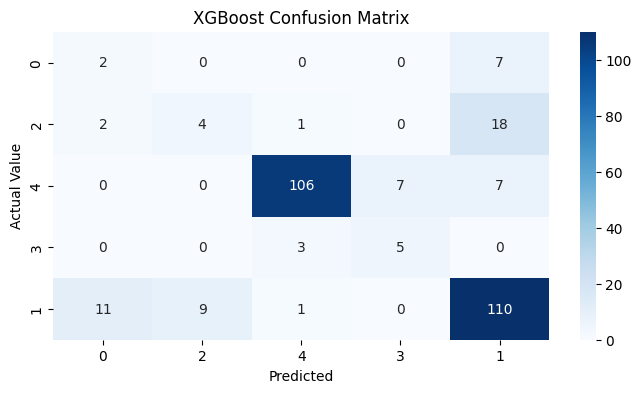

In [45]:
cm = confusion_matrix(y_test, y_pred_xg)
class_names = df['weather'].unique()

# visualize confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names, fmt='d')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual Value")
plt.show()

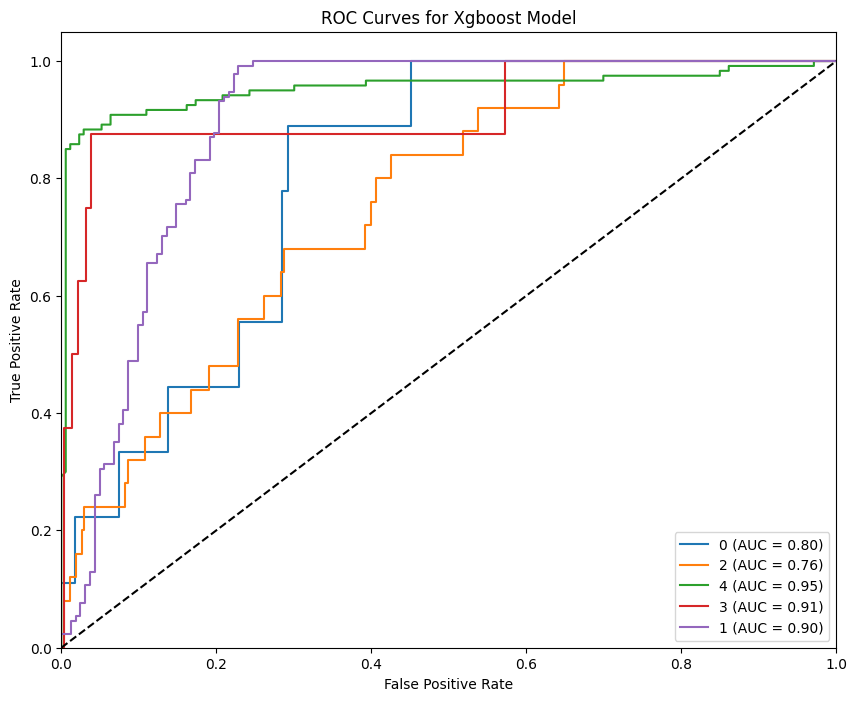

In [46]:
# Calculate ROC curve and AUC for each class
y_test_binarized = pd.get_dummies(y_test).values
y_pred_xg_proba = xg_model.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[class_names[i]], tpr[class_names[i]], _ = roc_curve(y_test_binarized[:, i], y_pred_xg_proba[:, i])
    roc_auc[class_names[i]] = auc(fpr[class_names[i]], tpr[class_names[i]])

# Plot ROC curves and AUC scores
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    plt.plot(fpr[class_names[i]], tpr[class_names[i]], label=f'{class_names[i]} (AUC = {roc_auc[class_names[i]]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Xgboost Model')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [47]:
lo_model = LogisticRegression(penalty='l2', C=2.0, solver='liblinear',)
lo_model.fit(x_train_resampled, y_train_resampled)
y_pred_lo = lo_model.predict(x_test)

print('-----------------')
print()

print("Logistic Regression:")
print(classification_report(y_test, y_pred_lo))

-----------------

Logistic Regression:
              precision    recall  f1-score   support

           0       0.12      0.67      0.20         9
           1       0.21      0.20      0.20        25
           2       0.90      0.81      0.85       120
           3       0.27      1.00      0.42         8
           4       0.91      0.56      0.70       131

    accuracy                           0.65       293
   macro avg       0.48      0.65      0.48       293
weighted avg       0.81      0.65      0.70       293



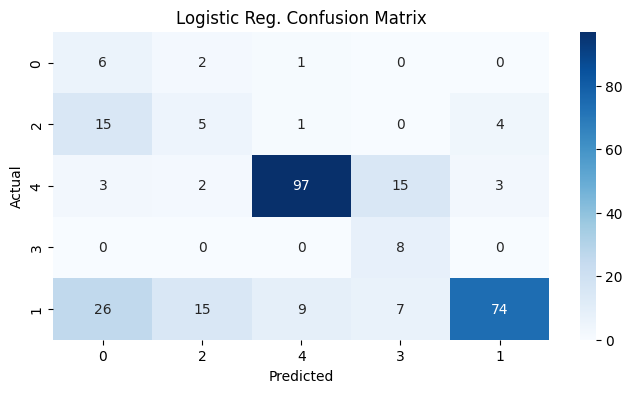

In [48]:
cm = confusion_matrix(y_test , y_pred_lo)
class_names = df['weather'].unique()

plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names, fmt='d')
plt.title("Logistic Reg. Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
# Calculate ROC curve and AUC for each class
y_test_binarized = pd.get_dummies(y_test).values
y_pred_lo_proba = lo_model.predict_proba(x_test)

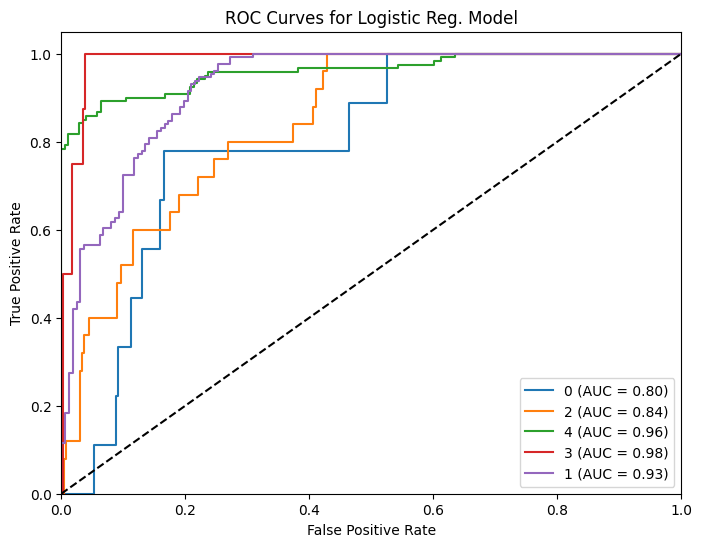

In [50]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_names)):
    fpr[class_names[i]], tpr[class_names[i]], _ = roc_curve(y_test_binarized[:, i], y_pred_lo_proba[:, i])
    roc_auc[class_names[i]] = auc(fpr[class_names[i]], tpr[class_names[i]])
    
# Plot ROC curves and AUC scores
plt.figure(figsize=(8,6))
for i in range(len(class_names)):
    plt.plot(fpr[class_names[i]], tpr[class_names[i]], label=f'{class_names[i]} (AUC = {roc_auc[class_names[i]]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Reg. Model')
plt.legend(loc='lower right')

plt.show()

## KNN Model

In [51]:
knn_model = KNeighborsClassifier(n_neighbors=3, n_jobs=None, weights='distance', p=3, metric='minkowski')
knn_model.fit(x_train_resampled, y_train_resampled)
y_pred_knn = knn_model.predict(x_test)

print("-------------"
      "-------------")
print()
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

--------------------------

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.06      0.22      0.09         9
           1       0.25      0.44      0.32        25
           2       0.89      0.79      0.84       120
           3       0.40      0.75      0.52         8
           4       0.76      0.53      0.63       131

    accuracy                           0.63       293
   macro avg       0.47      0.55      0.48       293
weighted avg       0.74      0.63      0.67       293



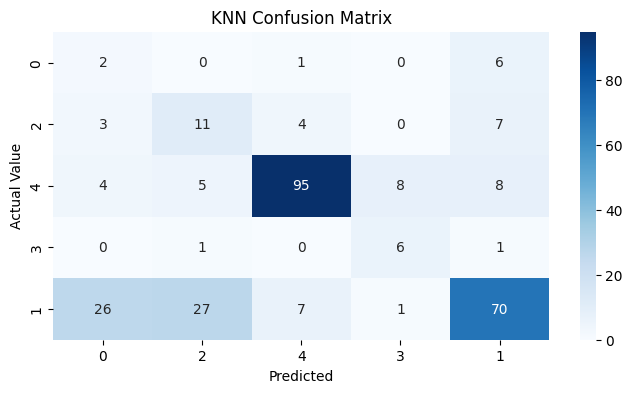

In [52]:
cm = confusion_matrix(y_test, y_pred_knn)
class_names = df['weather'].unique()

# visualize confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names, fmt='d')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual Value")
plt.show()

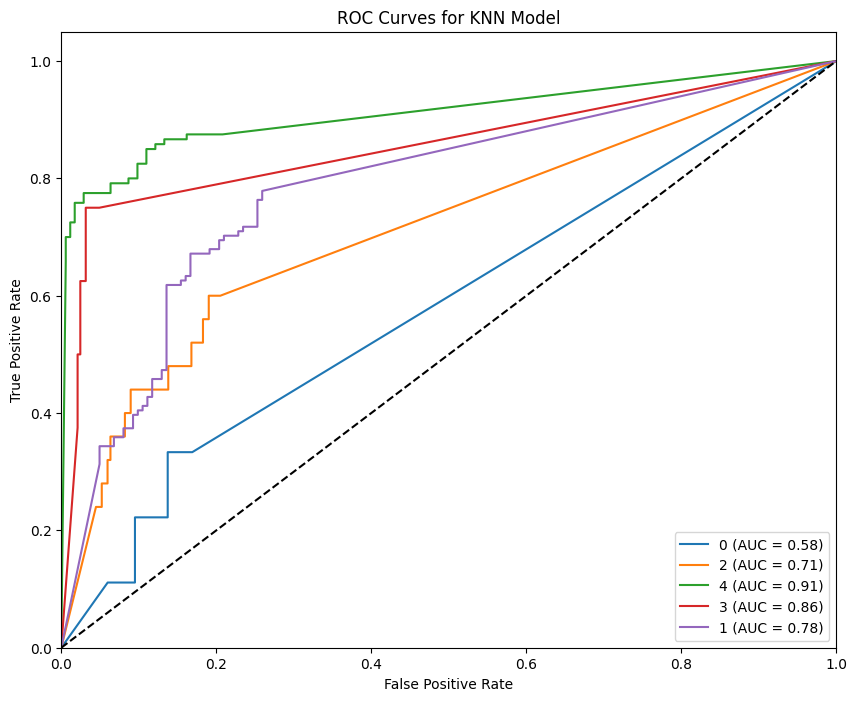

In [53]:
# Calculate ROC curve and AUC for each class
y_test_binarized = pd.get_dummies(y_test).values
y_pred_knn_proba = knn_model.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[class_names[i]], tpr[class_names[i]], _ = roc_curve(y_test_binarized[:, i], y_pred_knn_proba[:, i])
    roc_auc[class_names[i]] = auc(fpr[class_names[i]], tpr[class_names[i]])

# Plot ROC curves and AUC scores
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    plt.plot(fpr[class_names[i]], tpr[class_names[i]], label=f'{class_names[i]} (AUC = {roc_auc[class_names[i]]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for KNN Model')
plt.legend(loc="lower right")
plt.show()

## Ensemble Balanced Bagging

In [54]:

# Ensemble using Balanced Bagging Classifier
base_estimator = XGBClassifier()
params = {
    'base_estimator__max_depth': [3, 5, 7],
    'base_estimator__n_estimators': [100, 200, 300],
    'base_estimator__learning_rate': [0.01, 0.05, 0.1]
}

bagging_classifier = BalancedBaggingClassifier(base_estimator=base_estimator, random_state=42)
grid_search = GridSearchCV(bagging_classifier, params, cv=5, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(x_train, y_train)

# Evaluate the best model on the test set
y_pred = grid_search.best_estimator_.predict(x_test)
print("Best Hyperparameters: ", grid_search.best_params_)
print("Balanced Bagging Classifier Classification Report:")
print(classification_report(y_test, y_pred))

C:\Python310\lib\site-packages\imblearn\ensemble\_bagging.py:362: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Best Hyperparameters:  {'base_estimator__learning_rate': 0.05, 'base_estimator__max_depth': 7, 'base_estimator__n_estimators': 100}
Balanced Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.56      0.24         9
           1       0.20      0.44      0.28        25
           2       1.00      0.82      0.90       120
           3       0.36      1.00      0.53         8
           4       0.81      0.53      0.64       131

    accuracy                           0.65       293
   macro avg       0.51      0.67      0.52       293
weighted avg       0.80      0.65      0.70       293



## Predict model New Data

In [55]:
import numpy as np

In [56]:
new_data = pd.DataFrame({
    'precipitation': [0, 4.6, 0],
    'temp_max': [12.8, 9.4, 15],
    'temp_min': [6.1, 2.8, 3.9],
    'wind': [4.3, 1.8, 4]
})
# Make predictions on the new data
new_predictions = grid_search.best_estimator_.predict(new_data)

# Print the predictions
print("New Data Points:")
print(new_data)
print("\nPredictions:")
print(new_predictions)

New Data Points:
   precipitation  temp_max  temp_min  wind
0            0.0      12.8       6.1   4.3
1            4.6       9.4       2.8   1.8
2            0.0      15.0       3.9   4.0

Predictions:
[1 3 0]


In [57]:
# predict the value of the new data  model of knn 
new_data = pd.DataFrame({
    'precipitation': [0, 4.6, 0],
    'temp_max': [12.8, 9.4, 15],
    'temp_min': [6.1, 2.8, 3.9],
    'wind': [4.3, 1.8, 4]
})

new_predictions = knn_model.predict(new_data)


print("New data Points:")
print(new_data)
print("\nPredictions:")
print(new_predictions)

New data Points:
   precipitation  temp_max  temp_min  wind
0            0.0      12.8       6.1   4.3
1            4.6       9.4       2.8   1.8
2            0.0      15.0       3.9   4.0

Predictions:
[0 3 0]


In [58]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming xg_model is your trained XGBoost model

# Define new data
new_data = pd.DataFrame({
    'precipitation': [0, 0, 0, 0, 1.8],
    'temp_max': [23.3, 22.2, 25, 26.1, 21.1],
    'temp_min': [12.2, 10.6, 13.3, 13.9, 13.9],
    'wind': [2.1, 3.6, 2.5, 2.4, 4.5]
})

# Make predictions
new_predictions = xg_model.predict(new_data)

# Assuming you have true labels for the corresponding data points
true_labels = [4, 4, 4, 4, 2]  # Adjusted to match the number of predictions

# Calculate accuracy
accuracy = accuracy_score(true_labels, new_predictions)
accuracy_percentage = accuracy * 100  # Convert accuracy to percentage

print("New data Points:")
print(new_data)
print("\nPredictions:")
print(new_predictions)
print("\nTrue Labels:")
print(true_labels)
print("\nAccuracy: {:.2f}%".format(accuracy_percentage))


New data Points:
   precipitation  temp_max  temp_min  wind
0            0.0      23.3      12.2   2.1
1            0.0      22.2      10.6   3.6
2            0.0      25.0      13.3   2.5
3            0.0      26.1      13.9   2.4
4            1.8      21.1      13.9   4.5

Predictions:
[4 4 4 1 2]

True Labels:
[4, 4, 4, 4, 2]

Accuracy: 80.00%


In [59]:
# Logistic Regression trained model

# Define new data
new_data = pd.DataFrame({
    'precipitation': [0, 0, 0, 0, 1.8],
    'temp_max': [23.3, 22.2, 25, 26.1, 21.1],
    'temp_min': [12.2, 10.6, 13.3, 13.9, 13.9],
    'wind': [2.1, 3.6, 2.5, 2.4, 4.5]
})

# Make predictions
new_predictions = lo_model.predict(new_data)

# Assuming you have true labels for the corresponding data points
true_labels = [4, 4, 4, 4, 2]  # Adjusted to match the number of predictions

# Calculate accuracy
accuracy = accuracy_score(true_labels, new_predictions)
accuracy_percentage = accuracy * 100  # Convert accuracy to percentage

print("New data Points:")
print(new_data)
print("\nPredictions:")
print(new_predictions)
print("\nTrue Labels:")
print(true_labels)
print("\nAccuracy: {:.2f}%".format(accuracy_percentage))

New data Points:
   precipitation  temp_max  temp_min  wind
0            0.0      23.3      12.2   2.1
1            0.0      22.2      10.6   3.6
2            0.0      25.0      13.3   2.5
3            0.0      26.1      13.9   2.4
4            1.8      21.1      13.9   4.5

Predictions:
[0 4 4 4 2]

True Labels:
[4, 4, 4, 4, 2]

Accuracy: 80.00%
